In [1]:
# !pip3 install pandas
# !pip3 install seaborn
# !pip3 install matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
layoff_filepath = 'layoffs.csv'
layoffdf = pd.read_csv(layoff_filepath)

**Since the goal of this project is to predict a new target 'Laid off Quarter' based on feature 'date', we decide to add the new target column here before data processing stage. So we can see the potential relationship between target and other features.**


Q1: January, February, March

Q2: April, May, June

Q3: July, August, September

Q4: October, November, December

In [4]:
date_list = layoffdf['date'].values
quarters = []
for date in date_list:
    y_m_d = date.split("-")
    month = int(y_m_d[1])
    if (1<= month <= 3):
        quarter = 1
    elif (4<= month <= 6):
        quarter = 2
    elif (7<= month <= 9):
        quarter = 3
    else:
        quarter = 4
    quarters.append(quarter)
layoffdf['quarters'] = quarters
layoffdf.drop(columns=['date'])

,company,location,industry,total_laid_off,percentage_laid_off,stage,country,funds_raised,quarters
0,New Work,Hamburg,Consumer,400.0,NaN,Post-IPO,Germany,NaN,1
1,Playtika,Tel Aviv,Consumer,300.0,0.10,Post-IPO,Israel,NaN,1
2,Discord,SF Bay Area,Consumer,170.0,0.17,Series H,United States,995.0,1
3,Inmobi,Bengaluru,Marketing,125.0,0.05,Unknown,India,320.0,1
4,Audible,New York City,Media,100.0,0.05,Acquired,United States,14.0,1
...,...,...,...,...,...,...,...,...,...
3308,Service,Los Angeles,Travel,NaN,1.00,Seed,United States,5.1,1
3309,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,Unknown,United States,45.0,1
3310,Panda Squad,SF Bay Area,Consumer,6.0,0.75,Seed,United States,1.0,1
3311,Tamara Mellon,Los Angeles,Retail,20.0,0.40,Series C,United States,90.0,1


## Data Exploration

In [5]:
layoffdf.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,quarters
0,New Work,Hamburg,Consumer,400.0,NaN,2024-01-11,Post-IPO,Germany,NaN,1
1,Playtika,Tel Aviv,Consumer,300.0,0.10,2024-01-11,Post-IPO,Israel,NaN,1
2,Discord,SF Bay Area,Consumer,170.0,0.17,2024-01-11,Series H,United States,995.0,1
3,Inmobi,Bengaluru,Marketing,125.0,0.05,2024-01-11,Unknown,India,320.0,1
4,Audible,New York City,Media,100.0,0.05,2024-01-11,Acquired,United States,14.0,1


In [6]:
layoffdf.shape

(3313, 10)

In [7]:
layoffdf.describe()

,total_laid_off,percentage_laid_off,funds_raised,quarters
count,2189.000000,2141.000000,2962.000000,3313.000000
mean,242.146185,0.277458,775.056616,2.416843
std,767.384119,0.281162,4886.777257,1.074706
min,3.000000,0.000000,0.000000,1.000000
25%,40.000000,0.100000,51.000000,2.000000
50%,80.000000,0.170000,163.000000,2.000000
75%,180.000000,0.300000,454.500000,3.000000
max,12000.000000,1.000000,121900.000000,4.000000


In [8]:
columns = layoffdf.columns
columns

Index(['company', 'location', 'industry', 'total_laid_off',
       'percentage_laid_off', 'date', 'stage', 'country', 'funds_raised',
       'quarters'],
      dtype='object')

In [9]:
layoffdf.dtypes

company                 object
location                object
industry                object
total_laid_off         float64
percentage_laid_off    float64
date                    object
stage                   object
country                 object
funds_raised           float64
quarters                 int64
dtype: object

In [10]:
layoffdf.isnull().sum()

company                   0
location                  1
industry                  1
total_laid_off         1124
percentage_laid_off    1172
date                      0
stage                     7
country                   0
funds_raised            351
quarters                  0
dtype: int64

In [11]:
print("Percentage of missing values:")
print(f"total_laid_off contains {round((1124 / layoffdf.shape[0]) * 100)} % missing values")
print(f"percentage_laid_off contains {round((1172 / layoffdf.shape[0]) * 100)} % missing values")
print(f"funds_raised contains {round((351 / layoffdf.shape[0]) * 100)} % missing values")

Percentage of missing values:
total_laid_off contains 34 % missing values
percentage_laid_off contains 35 % missing values
funds_raised contains 11 % missing values


## Data Visualizatoin

### Plots for numerical feature: 'total_laid_off'

<AxesSubplot:xlabel='total_laid_off', ylabel='Count'>

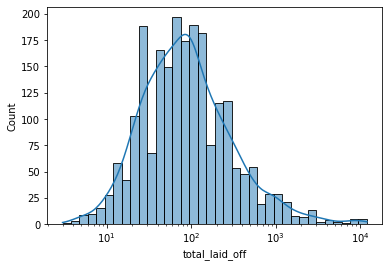

In [12]:
sns.histplot(layoffdf['total_laid_off'],log_scale=True,kde=True)

In [13]:
layoffdf['total_laid_off'].value_counts()

100.0     135
30.0       95
40.0       83
50.0       75
200.0      67
         ... 
6650.0      1
325.0       1
121.0       1
525.0       1
375.0       1
Name: total_laid_off, Length: 330, dtype: int64

### Plots for numerical feature: 'percentage_laid_off'

<AxesSubplot:xlabel='percentage_laid_off', ylabel='Count'>

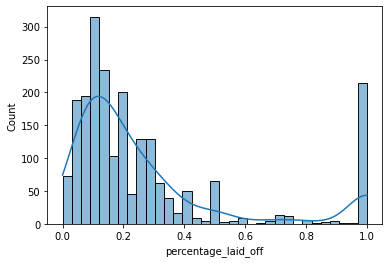

In [14]:
sns.histplot(layoffdf['percentage_laid_off'],kde=True)


In [15]:
layoffdf['percentage_laid_off'].value_counts()

1.000    214
0.100    209
0.200    170
0.150    131
0.250    112
        ... 
0.035      1
0.960      1
0.920      1
0.650      1
0.980      1
Name: percentage_laid_off, Length: 77, dtype: int64

### Plots for numerical feature: 'funds_raised'

In [16]:
funds = list(layoffdf['funds_raised'])
#get rid of NaN for visualization
funds = [x for x in funds if ~np.isnan(x)]
#funds contain minimum number 0, which is unable to use log scale
min(funds)

0.0

<AxesSubplot:ylabel='Count'>

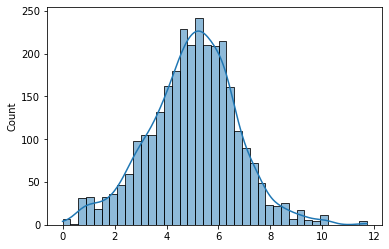

In [17]:
#log1p adds 1 to all the zero numbers
sns.histplot(np.log1p(funds),kde=True)

In [18]:
layoffdf['funds_raised'].value_counts()

1.0       29
1300.0    29
2.0       29
50.0      26
17.0      25
          ..
672.0      1
196.0      1
483.0      1
198.0      1
5.1        1
Name: funds_raised, Length: 712, dtype: int64

### Correlations

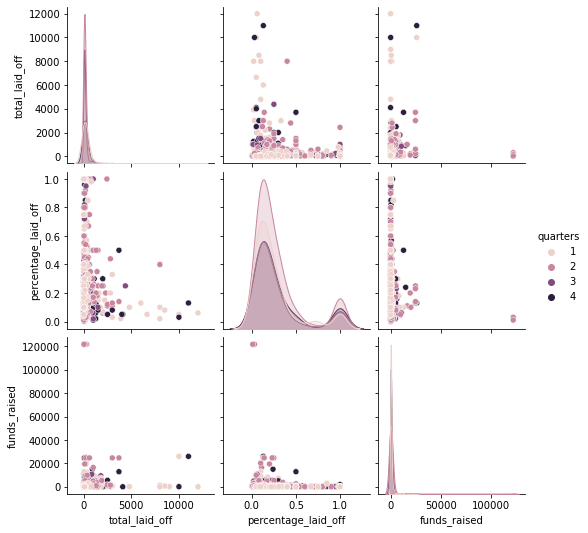

In [19]:
sns.pairplot(layoffdf, hue='quarters')

<AxesSubplot:>

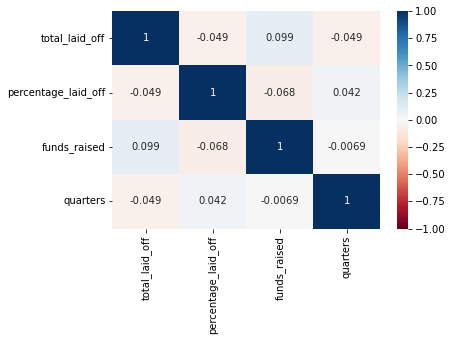

In [20]:
corr = layoffdf.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

### Categorical features

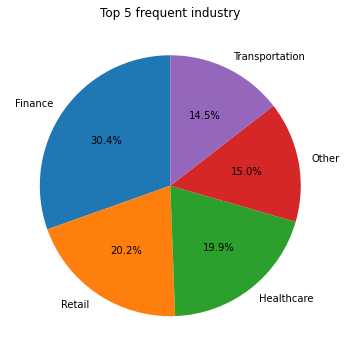

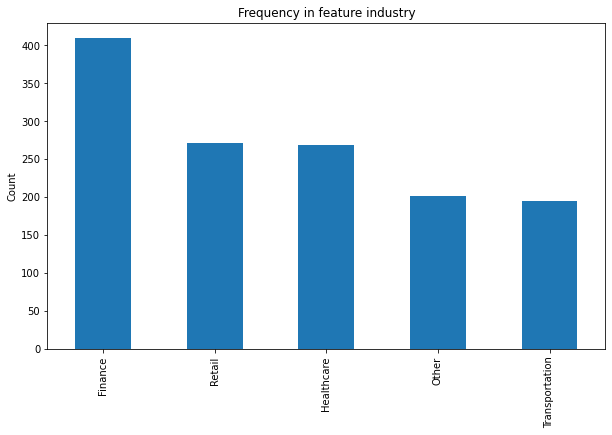

Index(['Finance', 'Retail', 'Healthcare', 'Other', 'Transportation'], dtype='object')


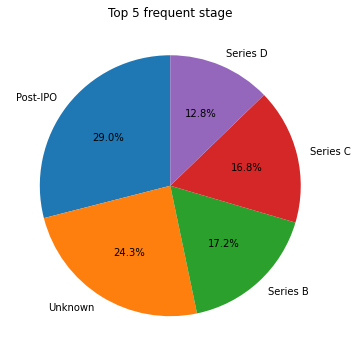

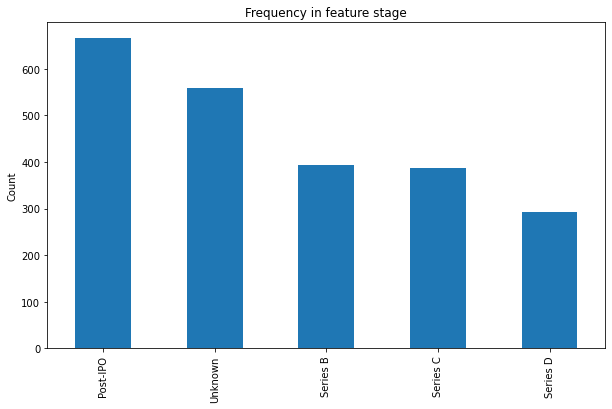

Index(['Post-IPO', 'Unknown', 'Series B', 'Series C', 'Series D'], dtype='object')


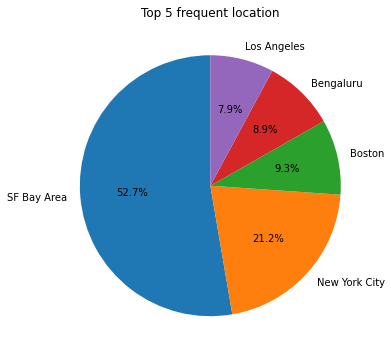

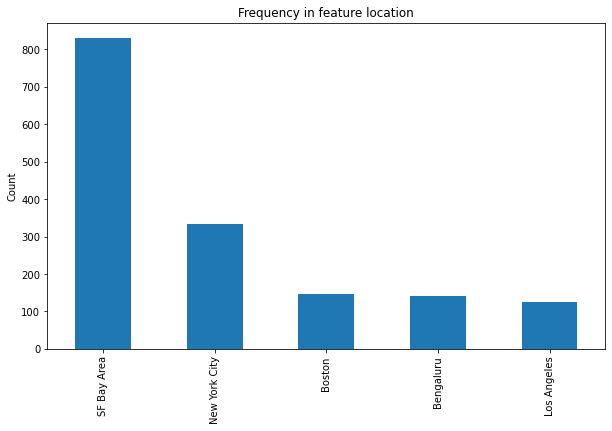

Index(['SF Bay Area', 'New York City', 'Boston', 'Bengaluru', 'Los Angeles'], dtype='object')


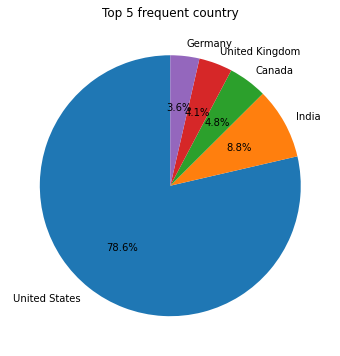

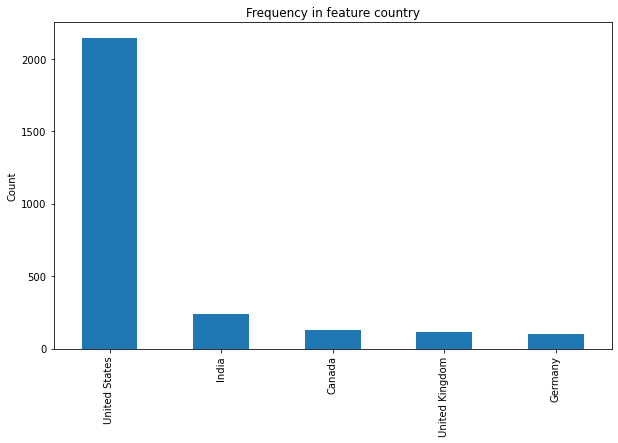

Index(['United States', 'India', 'Canada', 'United Kingdom', 'Germany'], dtype='object')


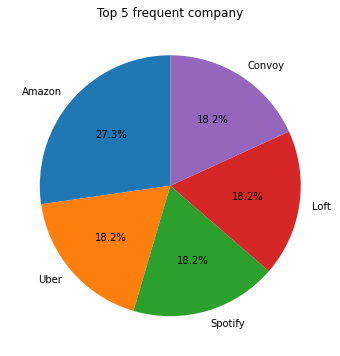

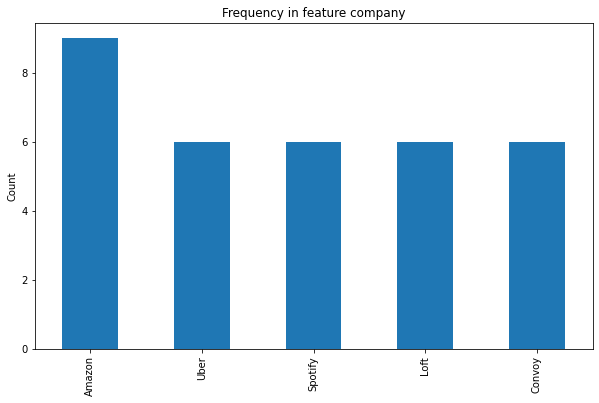

Index(['Amazon', 'Uber', 'Spotify', 'Loft', 'Convoy'], dtype='object')


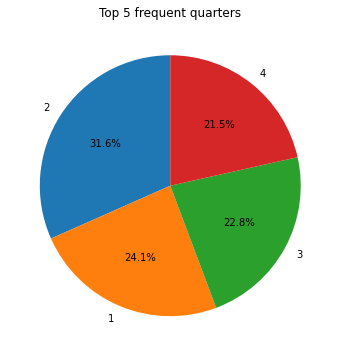

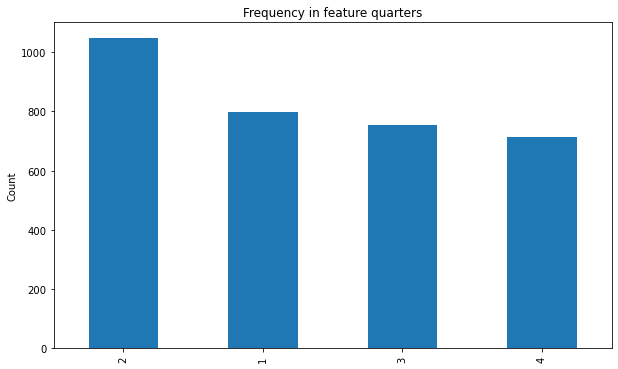

Int64Index([2, 1, 3, 4], dtype='int64')


In [21]:
column_names = ['industry', 'stage','location', 'country','company','quarters']
for column_name in column_names:
    value_counts = layoffdf[column_name].value_counts().head(5)

    # Plot a pie chart
    plt.figure(figsize=(10, 6))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Top 5 frequent {column_name}')
    plt.show()

    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar')
    plt.title(f'Frequency in feature {column_name}')
    plt.ylabel('Count')
    plt.show()
    print(value_counts.index)

# Data processing

### Missing values

In [22]:
# layoffdf['total_laid_off'].fillna(round(layoffdf['total_laid_off'].mean()), inplace=True)
# layoffdf['percentage_laid_off'].fillna(round(layoffdf['percentage_laid_off'].mean()), inplace=True)
# layoffdf['funds_raised'].fillna(round(layoffdf['funds_raised'].mean()), inplace=True)